# Simulação de uma carteira com um subconjunto de ativos

Considere o seguinte problema:
- Montar uma carteira com 10 fundos imobiliários negociados em bolsa
- Limitada a um custo de R$ 5.000,00
- Que possua a composição mais próxima possível do índice IFIX (um índice brasileiro de fundos imobiliários)

Esse exercício é interessante porque atualmente não existe um exchange traded fund (ETF) que acompanhe o IFIX, como por exemplo o que já ocorre com ETFs de Ibovespa e de Small Caps.

A restrição orçamentária é uma necessidade óbvia, porque cada investidor estipula um limite de recursos que deseja alocar para esse tipo de ativo. Já restringir o número de ativos também é importante, pois limita o custo de manutenção de carteira, os custos fixos de corretagem e aqueles derivados da complexidade tributária.

Descrevo aqui uma metodologia que elaborei, mas sem a intenção de competir com metodologias com melhor performance existentes. Para uma solução rigorosa deste problema, buscar na literatura por "fund management with benchmark index tracking" (e.g. considerar a discussão na introdução do artigo https://www.tandfonline.com/doi/full/10.1080/21649502.2013.803789).

Vários critérios diferentes poderiam ser utilizados para comparar a composição da carteira montada com a carteira do IFIX. Por exemplo, poderia se verificar a correlação da carteira montada com o índice IFIX. No entanto, optei por utilizar um critério mais simples neste exercício, que compara a composição percentual de cada ativo entre a carteira montada e a carteira IFIX. Abaixo está uma explicação melhor sobre esse critério.

Considere a situação hipotética de que o IFIX contenha apenas 5 ativos e que se deseja montar uma carteira com 3 desses 5 ativos. A tabela abaixo mostra a composição de cada ativo, assim como a diferença de composição entre as carteiras:

|Ativo|Carteira IFIX|Carteira proposta|Diferença (módulo)|
|-|-|-|-|
|JKAS11|35%|43%|8%|
|USJA11|25%|34%|9%|
|OSIA11|17%|23%|6%|
|LQOP11|13%|0%|13%|
|MAKS11|10%|0%|10%|
|Total|100%|100%|46%|

Assim, segundo a métrica que considerei, a carteira proposta possui uma diferença de 46% em relação à carteira IFIX. Observe também que se fosse proposta uma carteira com 0 ativos, haveria uma diferença de 100% em relação à carteira IFIX.

Note que uma carteira montada com apenas um ativo possui uma diferença em relação ao índice IFIX superior a 100%, o que é pior que uma carteira com zero ativos:

|Ativo|Carteira IFIX|Carteira proposta|Diferença (módulo)|
|-|-|-|-|
|JKAS11|35%|100%|65%|
|USJA11|25%|0%|25%|
|OSIA11|17%|0%|17%|
|LQOP11|13%|0%|13%|
|MAKS11|10%|0%|10%|
|Total|100%|100%|130%|

Um critério de diferença maior que 100% para uma carteira com poucos ativos é ainda mais comum com a carteira IFIX real. Por exemplo, observe a carteira proposta abaixo, que contém 5 unidades de KNRI11, 8 unidades de KNIP11, 8 unidades de KNCR11, 4 unidades de HGBS11 e 5 unidades de BBPO11:

|Código|Preço Atual|Part. Carteira IFIX (%)|Unidades Carteira Proposta|Preço Total de Cada Ativo|Part. Carteira Proposta (%)|Diferença|
|-|-|-|-|-|-|-|
|KNRI11|199,6|6,472|5|998|20,6298086264847|14,1578086264847|
|KNIP11|117,02|5,332|8|936,16|19,3515046530761|14,0195046530761|
|KNCR11|106|5,101|8|848|17,5291359872335|12,4281359872335|
|HGBS11|301|4,147|4|1204|24,888065717723|20,741065717723|
|BBPO11|170,3|3,771|5|851,5|17,6014850154827|13,8304850154827|
|BRCR11|118,93|3,746|0|0|0|3,746|
|JSRE11|121,15|3,528|0|0|0|3,528|
|XPML11|138,77|3,464|0|0|0|3,464|
|HGLG11|212|3,389|0|0|0|3,389|
|HGRE11|203|2,957|0|0|0|2,957|
|Outros|-|58,093|0|0|0|58,093|
|Total|-|100|-|4837,66|100|150,354|

Para cada ativo, a tabela acima calcula o preço total pela multiplicação entre o preço atual do ativo pelas unidades de cada ativo na carteira proposta:

$Preço\_Total\_de\_Cada\_Ativo=Preço\_Atual \times Unidades\_Carteira\_Proposta$

Observe que a diferença entre a carteira proposta na tabela acima e o índice IFIX é de 150,354%. Um critério de diferença maior que 100% não é necessariamente ruim, mas mas na medida do possível deve-se buscar uma carteira com o menor critério de diferença possível.

## Metodologia empregada

Considere, por exemplo, o ativo KNRI11, que corresponde a 6,472% do IFIX na época da elaboração desse exercício. Portanto, se for escolhida uma carteira que não possua alguma unidade de KNRI11, a contribuição individual desse ativo para o erro da carteira proposta é de 6,472%. Na metologia que proponho, a ideia é buscar uma quantidade de KNRI11 a ser alocada na carteira que resulte em uma contribuição individual de erro menor que 6,472%.

De uma maneira mais formal, considere um ativo i, de preço $p_i$ que possua uma participação $f_i$ na carteira do IFIX. Em uma determinada carteira proposta $C_p$ de valor total T, o ativo i possui $q_i$ unidades. 

Assim, a participação de i em $C_p$ é 

\begin{equation*}
\frac{q_i \cdot p_i}{T}
\end{equation*}

E, portanto, a contribuição individual ($\epsilon_i$) de cada ativo i para o erro da carteira é

\begin{equation*}
\epsilon_i= \left\lvert f_i-\frac{q_i p_i}{T} \right\rvert
\end{equation*}

A linha azul do gráfico abaixo mostra a relação entre $\epsilon_i$ e $q_i$:
<div>
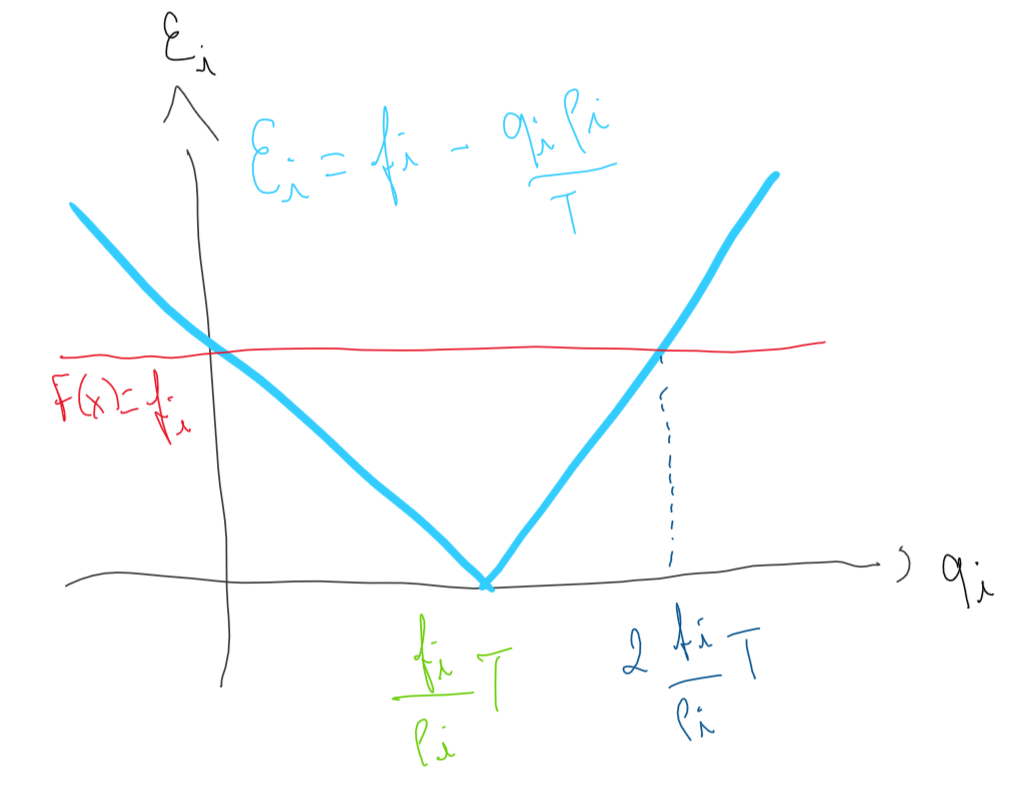
</div>


Como já sabemos, $\epsilon_i=f_i$ quando $q_i=0$. Assim, estamos principalmente interessados em valores de q_i em que $\epsilon_i < f_i$. Isso ocorre quando a linha azul do gráfico está abaixo da linha vermelha e, portanto, quando
\begin{equation*}
0<q_i<2\frac{f_i}{p_i}T
\end{equation*}

Considerando que os parâmetros $f_i$ e $p_i$ são fixos, o exercício agora é encontrar valores de $q_i$ para valores correspondentes de T. Como $q_i$ é sempre um número natural, T deve obedecer as seguintes condições:

Se $q_i=1$ então $1<2\frac{f_i}{p_i}T \implies T>\frac{p_i}{2f_i}$

Se $q_i=2$ então $2<2\frac{f_i}{p_i}T \implies T>2\frac{p_i}{2f_i}$

Se $q_i=3$ então $3<2\frac{f_i}{p_i}T \implies T>3\frac{p_i}{2f_i}$

E assim por diante. Assim, a cada nova unidade alocada para o ativo i, deve-se acrescentar ao valor da carteira a quantidade $\large\frac{p_i}{2f_i}$.

Observe que, quanto maior $f_i$, maior o potencial de um determinado ativo em reduzir o erro total da carteira. Portanto, uma estratégia interessante é também observar o ativos i com maior $f_i$ para começar a alocar a carteira.

O valor total de carteira T deve ser menor que o limite orçamentário proposto antes de montar a carteira. No entanto, intuitivamente sabemos que o erro total da carteira será tanto menor quanto mais flexíveis forem o valor total da carteira e o número de ativos. Portanto, o valor de T deve ser o mais próximo possível do limite orçamentário.

Com base nisso, proponho o seguinte algoritmo: 

### Etapa de Preparação

1. Calcule para cada ativo i o valor $p_i/(2f_i)$
2. Procure o elemento com maior $p_{i_{maior}}/(2f_{i_{maior}})$ e calcule um número arbitrário de combinações ($q_{i_{maior}}$,$q_{i_{maior}} p_{i_{maior}}/(2f_{i_{maior}})$). Por exemplo, poderiam ser consideradas 10 combinações:

\begin{equation*}
[(1,1 \cdot p_{i_{maior}}/(2f_{i_{maior}})),(2,2 \cdot p_{i_{maior}}/(2f_{i_{maior}})), (3,3 \cdot p_{i_{maior}}/(2f_{i_{maior}})), ...,(10,10 \cdot p_{i_{maior}}/(2f_{i_{maior}}))]
\end{equation*}

3. A última combinação calculada no passo anterior é o valor máximo de carteira que o algoritmo pode avaliar: 

\begin{equation*}
T_{max}=10 \cdot p_{i_{maior}}/(2f_{i_{maior}})
\end{equation*}

4. Para cada ativo i, calcule o número máximo de unidades possíveis para $T_{max}$, com base na fórmula 

\begin{equation*}
\large \left\lfloor\frac{T_{max}}{\frac{p_i}{2f_i}}\right\rfloor
\end{equation*}
Obs.: $\left\lfloor x \right\rfloor$ significa arredondar x para baixo

5. Para cada ativo i e número de unidades possíveis [1,2,3,...], calcular as combinações $(q_i,q_i p_i/(2f_i))$. Por exemplo, se para um ativo i, o passo 4 resultou no valor $\large \left\lfloor\frac{T_{max}}{\frac{p_i}{2f_i}}\right\rfloor=3$, calcular $[(1,1\cdot p_i/(2f_i)),(2,2\cdot p_i/(2f_i)),(1,3\cdot p_i/(2f_i))]$

6. Ordenar todas as combinações calculadas em ordem crescente $q_i p_i/(2f_i)$



### Etapa de Seleção da Carteira

1. Faça T igual ao menor valor encontrado de $q_{i_{menor1}} p_{i_{menor1}}/(2f_{i_{menor1}})$, que corresponde a algum ativo ${i_{menor1}}$. Nesse caso, a carteira só contém o próprio elemento ${i_{menor1}}$
2. Faça T igual ao segundo menor valor encontrado $q_{i_{menor2}} p_{i_{menor2}}/(2f_{i_{menor2}})$. Entre $i_{menor1}$ e $i_{menor2}$, escolha o ativo que tiver maior $f_i$. Considerando o orçamento total T, se ainda sobrar dinheiro disponível após alocar o dinheiro para a primeira unidade, alocar também o outro ativo para a carteira.
3. Pegue o próximo valor de T seguindo a ordem dos valores de $q_{i_{menor1}} p_{i_{menor1}}/(2f_{i_{menor1}})$. Selecione todas as combinações $(q_i,q_i p_i/(2f_i))\le T$. Aloque sempre os ativos começando por aqueles com maior $f_i$. Quando um ativo i for escolhido, escolher sempre a maior quantidade $q_{i}$ possível, desde que ainda haja dinheiro não alocado disponível. O número total de ativos alocados não pode ser superior ao número máximo de ativos.
4. Para cada nova carteira calculada, calcular a diferença em relação à carteira de referência (IFIX)
5. Pegar a última carteira calculada com T menor que o limite orçamentário.

O código abaixo ilustra o processo para uma única combinação do ativo com maior $p_{i_{maior}}/(2f_{i_{maior}})$.

O algoritmo foi simulado duas vezes, uma para número máximo de 20 ativos e outra para 10 ativos. Observe que para os limite de ativos de 20 e 10, não foi possível chegar próximo ao limite orçamentário desejado de R$ 5000. Note também que um erro menor que 1 só foi obtido no experimento com 20 ativos.

In [1]:
import yfinance as yf
from bs4 import BeautifulSoup as bs
import pandas as pd
import requests
import numpy as np

In [2]:
site_ifix='http://bvmf.bmfbovespa.com.br/indices/ResumoCarteiraTeorica.aspx?Indice=IFIX&idioma=pt-br'

In [3]:
page = requests.get(site_ifix)
fundos=pd.read_html(str(bs(page.content).find(name='table')),decimal=',',thousands='.')[0]
fundos=fundos.drop(len(fundos)-1).sort_values('Part. (%)',ascending=False)
fundos['Código']=fundos['Código']+'.SA'
fundos['Part. (%)']=fundos['Part. (%)']/100
fundos['Preço Atual']=[yf.Ticker(ticker).history(period='1d').Close[0] for ticker in fundos['Código']]
linhas=len(fundos)
fundos=fundos[~pd.isnull(fundos['Preço Atual'])]
fundos['Cart Minima']=fundos['Preço Atual']/(2*fundos['Part. (%)'])
fundos.index=list(range(len(fundos)))

In [4]:
def calcula_soma(elementos):
    tabela=fundos[['Preço Atual']]
    
    return(sum(tabela['Preço Atual']*(elementos)))

In [5]:
def calcula_ajuste(elementos):
    tabela=fundos[['Preço Atual','Part. (%)']]
    soma=calcula_soma(elementos)
    return(sum(abs(tabela['Preço Atual']*(elementos+[0]*(linhas-len(elementos)))/soma-tabela['Part. (%)'])))

In [6]:
def n_ativos(elementos):
    return(len([a for a in elementos if a>0]))

In [7]:
numero_combinacoes_ativo_maior=1

In [8]:
T_max=fundos.sort_values('Cart Minima',ascending=False).head().iloc[0,6]*numero_combinacoes_ativo_maior

In [9]:

qnt_max=[int(np.floor(T_max/fundos['Cart Minima'].iloc[i])) for i in range(len(fundos))]

tab_multiplos=pd.DataFrame([{'Ativo':0,'Quantidade':a,'Cart Minima':fundos['Cart Minima'].iloc[0]*a,'Part. (%)':fundos['Part. (%)'].iloc[0],'Preço Atual':fundos['Preço Atual'].iloc[0]} for a in range(1,qnt_max[0])])

for i in range(1,len(qnt_max)):
    
    tab_multiplos=tab_multiplos.append(pd.DataFrame([{'Ativo':i,'Quantidade':a,'Cart Minima':fundos['Cart Minima'].iloc[i]*a,'Part. (%)':fundos['Part. (%)'].iloc[i],'Preço Atual':fundos['Preço Atual'].iloc[i]} for a in range(1,qnt_max[i])]))

    
tab_multiplos=tab_multiplos.sort_values('Cart Minima')



In [10]:
maximo_ativos=20

carteiras_calculadas=[]

for i in range(1000):
    T=tab_multiplos['Cart Minima'].iloc[i]
    selecao=tab_multiplos[tab_multiplos['Cart Minima']<=T].sort_values('Part. (%)',ascending=False)
    selecao=selecao[selecao.groupby(['Ativo'], sort=False)['Quantidade'].transform(max)==selecao['Quantidade']]
    carteira=[0]*linhas
    limite_atual=T
    j=0
    ativos=0
    while (j<len(selecao))&(ativos<maximo_ativos):
        if (limite_atual/selecao['Preço Atual'].iloc[j])>=1:
            qnt=min(np.floor(limite_atual/selecao['Preço Atual'].iloc[j]),
                                                           np.floor(T/selecao['Cart Minima'].iloc[j]))
            limite_atual=limite_atual-qnt*selecao['Preço Atual'].iloc[j]
            carteira[selecao['Ativo'].iloc[j]]=qnt
            ativos=n_ativos(carteira)

        j=j+1
        
    carteiras_calculadas.append({'carteira':carteira,'erro':calcula_ajuste(carteira),'custo':calcula_soma(carteira),'ativos':n_ativos(carteira)})

carteiras_calculadas=pd.DataFrame(carteiras_calculadas)
carteiras_calculadas['indice']=carteiras_calculadas.index.values
carteiras_calculadas=carteiras_calculadas[carteiras_calculadas.groupby(['ativos'], sort=False)['erro'].transform(min)==carteiras_calculadas['erro']]
carteiras_calculadas=carteiras_calculadas[carteiras_calculadas.groupby(['ativos'], sort=False)['indice'].transform(min)==carteiras_calculadas['indice']]
carteiras_calculadas

,carteira,erro,custo,ativos,indice
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.995660,1.29,1,0
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.970560,15.03,2,1
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.961960,19.94,3,2
3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.953440,24.91,4,3
7,"[0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",1.859340,131.12,5,7
11,"[0, 1.0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1.760720,250.12,6,11
14,"[1.0, 1.0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.641460,449.50,7,14
16,"[1.0, 1.0, 1.0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0...",1.571820,569.55,8,16
19,"[1.0, 1.0, 1.0, 0, 1.0, 0, 0, 0, 1.0, 0, 0, 0,...",1.509352,692.05,9,19
21,"[1.0, 1.0, 1.0, 0, 1.0, 0, 0, 0, 1.0, 0, 0, 0,...",1.506327,698.55,10,21


In [11]:
maximo_ativos=10

carteiras_calculadas=[]

for i in range(1000):
    T=tab_multiplos['Cart Minima'].iloc[i]
    selecao=tab_multiplos[tab_multiplos['Cart Minima']<=T].sort_values('Part. (%)',ascending=False)
    selecao=selecao[selecao.groupby(['Ativo'], sort=False)['Quantidade'].transform(max)==selecao['Quantidade']]
    carteira=[0]*linhas
    limite_atual=T
    j=0
    ativos=0
    while (j<len(selecao))&(ativos<maximo_ativos):
        if (limite_atual/selecao['Preço Atual'].iloc[j])>=1:
            qnt=min(np.floor(limite_atual/selecao['Preço Atual'].iloc[j]),
                                                           np.floor(T/selecao['Cart Minima'].iloc[j]))
            limite_atual=limite_atual-qnt*selecao['Preço Atual'].iloc[j]
            carteira[selecao['Ativo'].iloc[j]]=qnt
            ativos=n_ativos(carteira)

        j=j+1
        
    carteiras_calculadas.append({'carteira':carteira,'erro':calcula_ajuste(carteira),'custo':calcula_soma(carteira),'ativos':n_ativos(carteira)})

carteiras_calculadas=pd.DataFrame(carteiras_calculadas)
carteiras_calculadas['indice']=carteiras_calculadas.index.values
carteiras_calculadas=carteiras_calculadas[carteiras_calculadas.groupby(['ativos'], sort=False)['erro'].transform(min)==carteiras_calculadas['erro']]
carteiras_calculadas=carteiras_calculadas[carteiras_calculadas.groupby(['ativos'], sort=False)['indice'].transform(min)==carteiras_calculadas['indice']]
carteiras_calculadas

,carteira,erro,custo,ativos,indice
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.995660,1.29,1,0
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.970560,15.03,2,1
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.961960,19.94,3,2
3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.953440,24.91,4,3
7,"[0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",1.859340,131.12,5,7
11,"[0, 1.0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1.760720,250.12,6,11
14,"[1.0, 1.0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.641460,449.50,7,14
16,"[1.0, 1.0, 1.0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0...",1.571820,569.55,8,16
19,"[1.0, 1.0, 1.0, 0, 1.0, 0, 0, 0, 1.0, 0, 0, 0,...",1.509352,692.05,9,19
58,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1.220400,1707.16,10,58


## Comparação com o IFIX

O objetivo da seção abaixo é comparar a carteira obtida com dez ativos com o IFIX. Existe um viés nos cálculos dessa seção, por conta da fonte de dados de séries históricas dos ativos (yahoo finance), que não possui dados para todos os ativos em todos os períodos de tempo. O viés decorre da remoção de dados faltantes. Assim, apesar de o gráfico mostrar uma correlação forte entre IFIX e carteira proposta, essa correlação poderia ser perdida com a reinserção de algum dado faltante ou ao se olhar para períodos maiores de tempo.

De qualquer forma, como a carteira do IFIX muda ao longo do tempo, pode ocorrer descolamento do índice com a carteira montada quando se olha para períodos longos do tempo.

In [12]:
carteira_inicial=carteiras_calculadas['carteira'].iloc[-1]

In [13]:
ultimo_preenchido=max([k for k,v in [(i,carteira_inicial[i]) for i in range(len(carteira_inicial))] if v>0])
tickers=list(fundos['Código'].iloc[0:ultimo_preenchido])

In [14]:
dados=yf.Ticker(tickers[0]).history(period='2y')[['Close']]
dados.columns=[tickers[0]]

for i in range(len(tickers)-1):
    tabela=yf.Ticker(tickers[i+1]).history(period='2y')[['Close']]
    tabela.columns=[tickers[i+1]]
    
    dados=dados.merge(tabela,how='outer',left_index=True,right_index=True)

In [15]:
for i in range(ultimo_preenchido):
    dados.iloc[:,i]=dados.iloc[:,i]*carteira_inicial[i]

In [16]:
media=pd.DataFrame(dados.dropna().mean(axis=1))

media.columns=['Carteira']

In [17]:
ifix=pd.read_excel("IFIX.xlsx")
ifix.index=ifix['Date'].dt.date
ifix=ifix.drop('Date',axis=1)
ifix.columns=['IFIX']

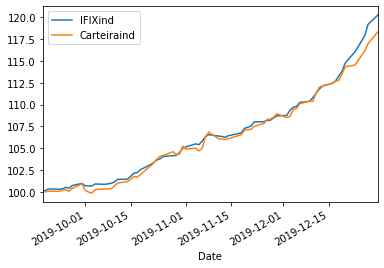

In [18]:
juncao=ifix.merge(media,left_index=True,right_index=True)['2019']
juncao['IFIXind']=juncao['IFIX']*100/juncao['IFIX'][0]
juncao['Carteiraind']=juncao['Carteira']*100/juncao['Carteira'][0]
juncao[['IFIXind','Carteiraind']].plot()